# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint 
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
query_url = url + "appid=" + api_key + "&q=" 

#City weather data
city_weather=[]

# Create settings dictionary with information we're interested in
#settings = {"units": "metric", "appid": api_key}

# Get weather data
Good_response = 0
for city in cities:
    #time.sleep(1)
    weather_response = requests.get(query_url + city + "&units=imperial")
    weather_json = weather_response.json()
    #print(weather_json["cod"])
    if weather_json["cod"] == 404:
        print("City not found, keep trying")
    if weather_json["cod"] == 200:
        Good_response= Good_response + 1
        print(f"Response #{Good_response} | City: {city}")
        city_weather.append([weather_json['name'], weather_json["sys"]["country"], weather_json["coord"]["lat"], weather_json["coord"]["lon"], weather_json["wind"]["speed"], weather_json["main"]["humidity"], weather_json["main"]["temp"], weather_json["clouds"]["all"]])
    if Good_response >= 500:
        break 


# channels_list = []
# # For each channel, we access its information through its API
# for channel in channels:
#     JSONContent = requests.get("https://wind-bow.glitch.me/twitch-api/channels/" + channel).json()
#     channels_list.append([JSONContent['_id'], JSONContent['display_name'], JSONContent['status'],
#                          JSONContent['followers'], JSONContent['views']])
                         
# dataset = pd.DataFrame(channels_list)
# dataset.sample(5)  


Response #1 | City: jacksonville
Response #2 | City: meadow lake
Response #3 | City: puerto ayora
Response #4 | City: ribeira grande
Response #5 | City: udachnyy
Response #6 | City: egvekinot
Response #7 | City: bredasdorp
Response #8 | City: castro
Response #9 | City: ushuaia
Response #10 | City: ponta do sol
Response #11 | City: yellowknife
Response #12 | City: bluff
Response #13 | City: nanortalik
Response #14 | City: tahe
Response #15 | City: khatanga
Response #16 | City: kaitangata
Response #17 | City: vao
Response #18 | City: grindavik
Response #19 | City: ambalavao
Response #20 | City: bethel
Response #21 | City: mar del plata
Response #22 | City: boende
Response #23 | City: georgetown
Response #24 | City: hithadhoo
Response #25 | City: carahue
Response #26 | City: mataura
Response #27 | City: rikitea
Response #28 | City: avarua
Response #29 | City: nivala
Response #30 | City: broken hill
Response #31 | City: albany
Response #32 | City: tuktoyaktuk
Response #33 | City: saint-phi

In [26]:
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 36.75, 'lon': 26.96},
 'dt': 1555195800,
 'id': 260308,
 'main': {'humidity': 82,
          'pressure': 1009,
          'temp': 59,
          'temp_max': 59,
          'temp_min': 59},
 'name': 'Kefalos',
 'sys': {'country': 'GR',
         'id': 6618,
         'message': 0.0038,
         'sunrise': 1555213203,
         'sunset': 1555260276,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'speed': 2.24}}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
import csv

with open('City_Weather.csv', 'w', newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(city_weather)

csvFile.close()

In [29]:
City_dataset = pd.DataFrame(city_weather)
City_dataset.columns = ["City", "Country", "Latitude", "Longitude", "Wind Speed", "Humidity", "Temp", "Cloudiness" ]

In [30]:
City_dataset.head(5)

,City,Country,Latitude,Longitude,Wind Speed,Humidity,Temp,Cloudiness
0,Jacksonville,US,30.33,-81.66,9.17,69,77.76,1
1,Meadow Lake,CA,54.13,-108.44,13.87,30,53.60,75
2,Puerto Ayora,EC,-0.74,-90.35,14.99,74,82.58,20
3,Ribeira Grande,PT,38.52,-28.70,12.08,100,58.79,48
4,Udachnyy,RU,66.42,112.40,4.47,83,-4.01,0


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

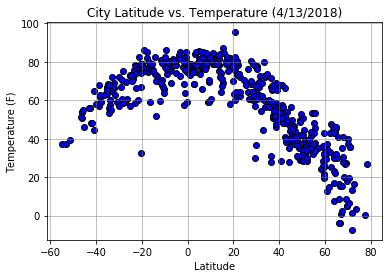

<Figure size 432x288 with 0 Axes>

In [31]:
lat = City_dataset["Latitude"]
temp = City_dataset["Temp"]

plt.scatter(lat, temp, marker = "o", c="blue", edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("City Latitude vs. Temperature (4/13/2018)")
plt.grid(color='gray', linestyle='-', linewidth=.5)
plt.show()
plt.savefig('LatvTemp.png')

#### Latitude vs. Humidity Plot

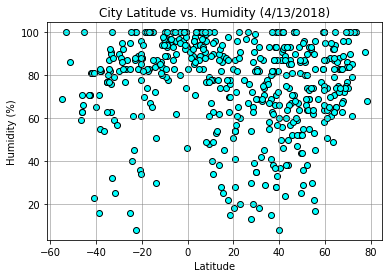

<Figure size 432x288 with 0 Axes>

In [38]:
lat = City_dataset["Latitude"]
humidity = City_dataset["Humidity"]

plt.scatter(lat, humidity, marker = "o", c="aqua", edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (4/13/2018)")
plt.grid(color='gray', linestyle='-', linewidth=.5)
plt.show()
plt.savefig("LatvHum.png")

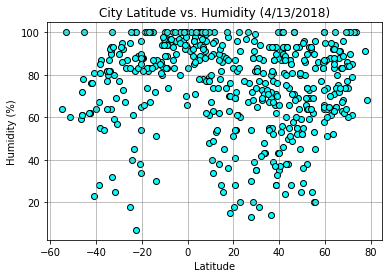

In [24]:
#My original run included a huge outlier (Hum=290%). I had to rerun and that city wasn't included in the output - but this is how I resolved. Keeping because it made me happy :-)

#Look at dataset - The high humidity is in Paita, Peru. I confirmed the output by going back to Openweather.org and inputting the city. But then I checked against another weather website - it shows only 69% humidity. 

# City_dataset.drop(City_dataset.index[146], inplace=True)

# lat = City_dataset["Latitude"]
# humidity = City_dataset["Humidity"]

# plt.scatter(lat, humidity, marker = "o", c="aqua", edgecolors = "black")
# plt.xlabel("Latitude")
# plt.ylabel("Humidity (%)")
# plt.title("City Latitude vs. Humidity (4/13/2018)")
# plt.grid(color='gray', linestyle='-', linewidth=.5)
# plt.show()
# plt.savefig('LatvHum.png')

#### Latitude vs. Cloudiness Plot

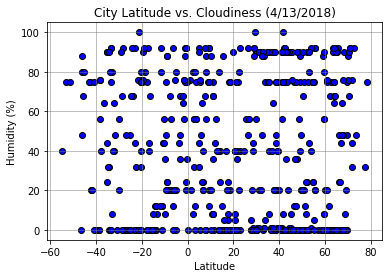

<Figure size 432x288 with 0 Axes>

In [35]:
lat = City_dataset["Latitude"]
humidity = City_dataset["Cloudiness"]

plt.scatter(lat, humidity, marker = "o", c="blue", edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Cloudiness (4/13/2018)")
plt.grid(color='gray', linestyle='-', linewidth=.5)
plt.show()
plt.savefig('LatvClouds.png')

#### Latitude vs. Wind Speed Plot

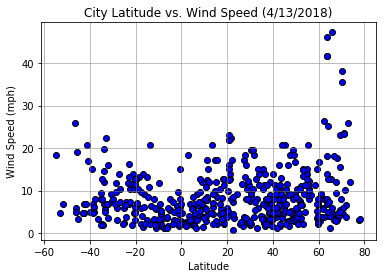

<Figure size 432x288 with 0 Axes>

In [36]:
lat = City_dataset["Latitude"]
humidity = City_dataset["Wind Speed"]

plt.scatter(lat, humidity, marker = "o", c="blue", edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (4/13/2018)")
plt.grid(color='gray', linestyle='-', linewidth=.5)
plt.show()
plt.savefig('LatvWindSp.png')